In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [2]:
class CustomDBSCAN:
    def __init__(self):
        pass
    def fit(self,D, eps, MinPts):
        labels = [0]*len(D)
        C = 0
        # Iterate over each data point in the dataset
        for P in range(0, len(D)):
        # Check if this data point assigned to a cluster or not---- 
        # if assigned skip this point and choose another point-----
            if not (labels[P] == 0):
                continue
        # go to RegionQuery function when the point 
        # isnot assigned to any label yet (label[P] is 0)
            NeighborPts = self.regionQuery(D, P, eps)
        # Then Check the number of neighors
            if len(NeighborPts) < MinPts:
        # if the number less than Minpoints the it is Outlier! 
                labels[P] = -1  
            else: 
        # if > Minpoints ----then our point is core point.. 
        # assign to the cluster a number and Grow the cluster 
        # to include all points that achieve (eps, Minpoints)
                C += 1
                self.growCluster(D, labels, P, NeighborPts, C, eps, MinPts)
        return labels, len(set(labels))
    ##########################################################################
    def growCluster(self,D, labels, P, NeighborPts, C, eps, MinPts):
        # First assign the point to its new cluster..
        labels[P] = C
        i = 0
        # Iterate over all Our core point neighbor..
        while i < len(NeighborPts):    
            Pn = NeighborPts[i]
            # Check If the neighbour point (in core point reqion)
            # Assigned before as outlier--- reassign it to our cluster
            if labels[Pn] == -1:
                labels[Pn] = C
            # Check too if this neighbour is still at intialization...
            # Assign it too to the new cluster
            elif labels[Pn] == 0:
                labels[Pn] = C
            # Then calcutate the RegionQuery and get its neighbour list..
                PnNeighborPts = self.regionQuery(D, Pn, eps)
            # Check the neighbours list of each neighour with the core eps..
            # If the number of its neighbour is > minpoints...
            # Then add this new list to the origin neighbour list of our core..
            # finally iterate for all points in the new list again..
                if len(PnNeighborPts) > MinPts:
                    NeighborPts = NeighborPts + PnNeighborPts
            i += 1 
    def regionQuery(self,D, P, eps):
        neighbors = []
        for Pn in range(0, len(D)):
            if np.linalg.norm(D[P] - D[Pn]) <= eps:
                neighbors.append(Pn)
        return neighbors
    
    def visualize(self,data, labels, numberOfClusters):
        N = len(data)
        colors = ['g','k', 'c', 'm', 'y', 'b']
        for i in list(set(labels)): 
            if (i == -1):
            # Plot all outliers point as blue
                color = 'r'
            else:
                color = colors[i % len(colors)]
            x, y = [], []
            for j in range(N):
                if labels[j] == i: 
                    x.append(data[j, 0])
                    y.append(data[j, 1])
            plt.scatter(x, y, c=color, alpha=1, marker='o')
            plt.title('DBSCAN')
        plt.show()

In [3]:
# neigh = NearestNeighbors(n_neighbors=5)
# nbrs = neigh.fit(dfCricle)
# distances, indices = nbrs.kneighbors(dfCricle)
# distances = np.sort(distances, axis=0)
# distances = distances[:,1]
# plt.grid(True)
# plt.plot(distances)

In [4]:
# Reading from the data file
dfCricle = pd.read_csv("concentric_circles.csv")
dfBoxes  = pd.read_csv("boxes.csv")

In [5]:
# Convert to Array
datasetCircle = dfCricle.astype(float).values.tolist()
datasetBoxes  = dfBoxes.astype(float).values.tolist()

In [6]:
# normalize dataset
XCircle = StandardScaler().fit_transform(datasetCircle)
XBoxes  = StandardScaler().fit_transform(datasetBoxes)

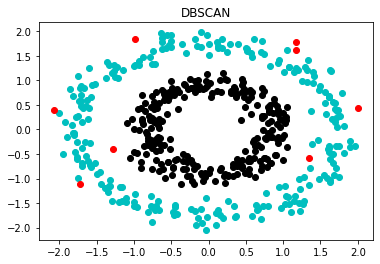

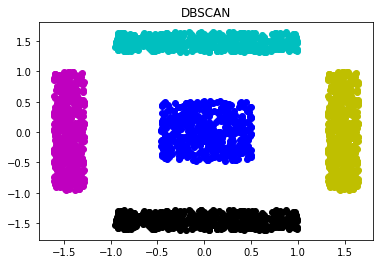

In [7]:
# Create object From CustomDBSCAN Class
custom_DBSCAN = CustomDBSCAN()

# Fit the datasets
circleLabels, circleClusters = custom_DBSCAN.fit(XCircle, 0.25, 4)
boxesLabels,  boxesClusters  = custom_DBSCAN.fit(XBoxes, 0.25, 4)

# Visualize 
custom_DBSCAN.visualize(XCircle, circleLabels, circleClusters)
custom_DBSCAN.visualize(XBoxes, boxesLabels, boxesClusters)

____________________________________________________________

In [8]:
from sklearn.datasets import make_moons,make_circles,make_blobs
import matplotlib.pyplot as plt
#Circle
x1,y1 = make_circles(n_samples=1500, factor=.5, noise=.05) 
#Moon
x2,y2 = make_moons(n_samples=1500,noise=0.09,random_state=0) 
#Varied
x3,y3 = make_blobs(n_samples=1500,cluster_std=[1.0, 2.5, 0.5],random_state=170) 
#Random
x4,y4 = np.random.rand(1500, 2), None  
# Blobs
x5,y5 = make_blobs(n_samples=1500,random_state=8)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(x5, transformation)
x6,y6 = (X_aniso, y5)

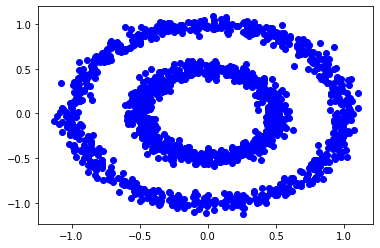

In [9]:
#Circle
plt.scatter(x1[:,0],x1[:,1],c="blue",marker="o")
plt.show()

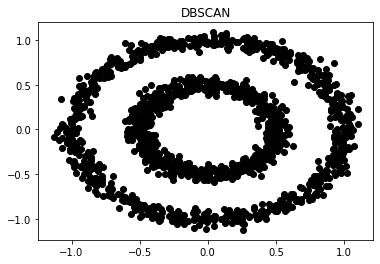

In [10]:
# Fit the datasets
circleLabels, circleClusters = custom_DBSCAN.fit(x1, 0.25, 4)
custom_DBSCAN.visualize(x1, circleLabels, circleClusters)

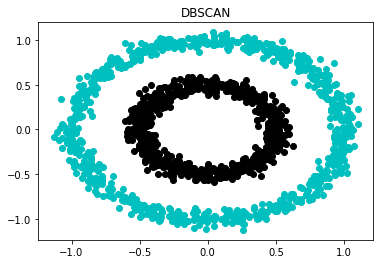

In [11]:
# Fit the datasets
circleLabels, circleClusters = custom_DBSCAN.fit(x1, 0.20, 4)
custom_DBSCAN.visualize(x1, circleLabels, circleClusters)

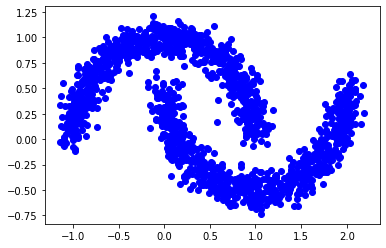

In [12]:
#Moon
plt.scatter(x2[:,0],x2[:,1],c="blue",marker="o")
plt.show()

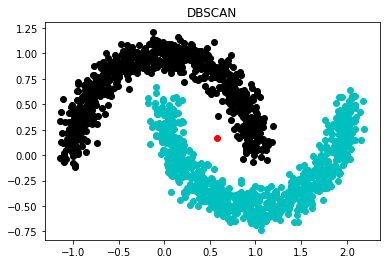

In [13]:
# Fit the datasets
moonLabels, moonClusters = custom_DBSCAN.fit(x2, 0.15, 4)
custom_DBSCAN.visualize(x2, moonLabels, moonClusters)

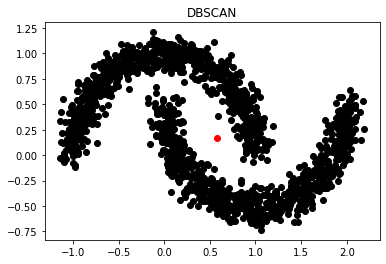

In [14]:
# Fit the datasets
moonLabels, moonClusters = custom_DBSCAN.fit(x2, 0.18, 4)
custom_DBSCAN.visualize(x2, moonLabels, moonClusters)

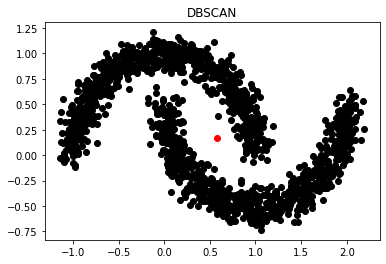

In [15]:
# Fit the datasets
moonLabels, moonClusters = custom_DBSCAN.fit(x2, 0.20, 4)
custom_DBSCAN.visualize(x2, moonLabels, moonClusters)

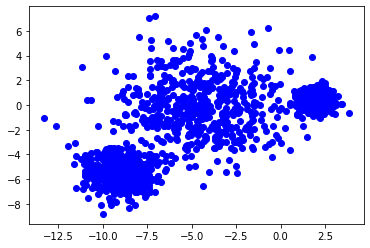

In [16]:
#Varied
plt.scatter(x3[:,0],x3[:,1],c="blue",marker="o")
plt.show()

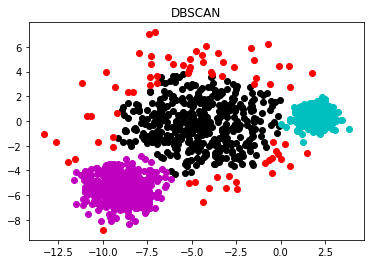

In [17]:
# Fit the datasets
variedLabels, variedClusters = custom_DBSCAN.fit(x3, 1,15)
custom_DBSCAN.visualize(x3, variedLabels, variedClusters)

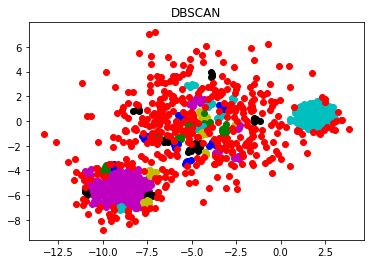

In [18]:
# Fit the datasets
variedLabels, variedClusters = custom_DBSCAN.fit(x3, 0.25,4)
custom_DBSCAN.visualize(x3, variedLabels, variedClusters)

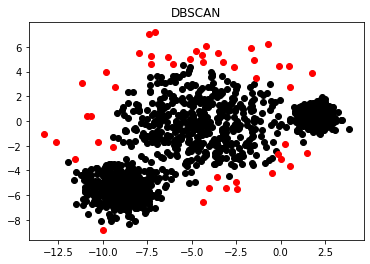

In [19]:
# Fit the datasets
variedLabels, variedClusters = custom_DBSCAN.fit(x3, 1,10)
custom_DBSCAN.visualize(x3, variedLabels, variedClusters)

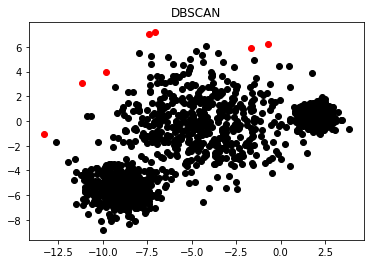

In [20]:
# Fit the datasets
variedLabels, variedClusters = custom_DBSCAN.fit(x3, 2,20)
custom_DBSCAN.visualize(x3, variedLabels, variedClusters)

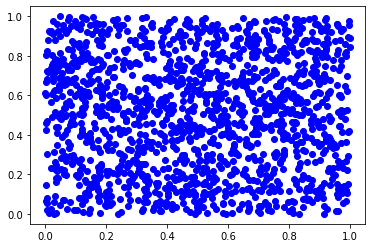

In [21]:
#Random
plt.scatter(x4[:,0],x4[:,1],c="blue",marker="o")
plt.show()

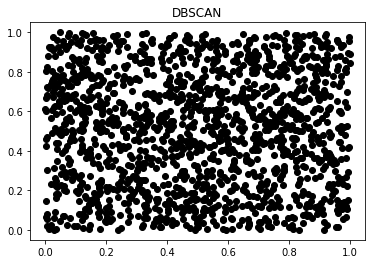

In [22]:
# Fit the datasets
rLabels, rClusters = custom_DBSCAN.fit(x4, 0.25, 4)
custom_DBSCAN.visualize(x4, rLabels, rClusters)

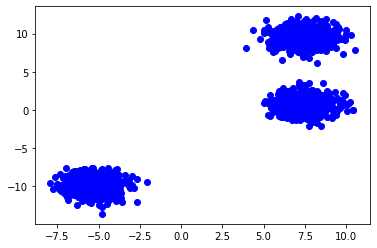

In [23]:
plt.scatter(x5[:,0],x5[:,1],c="blue",marker="o")
plt.show()

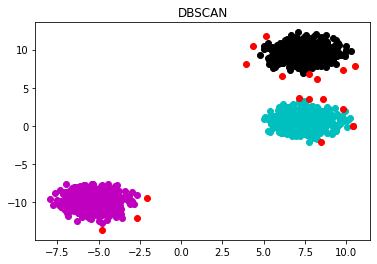

In [24]:
# Fit the datasets
sLabels, sClusters = custom_DBSCAN.fit(x5, 0.7, 8)
custom_DBSCAN.visualize(x5, sLabels, sClusters)

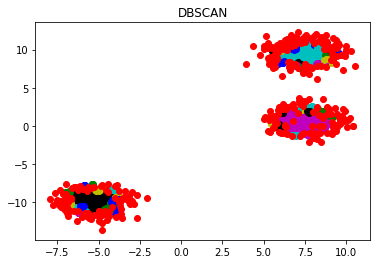

In [25]:
# Fit the datasets
sLabels, sClusters = custom_DBSCAN.fit(x5, 0.20, 4)
custom_DBSCAN.visualize(x5, sLabels, sClusters)

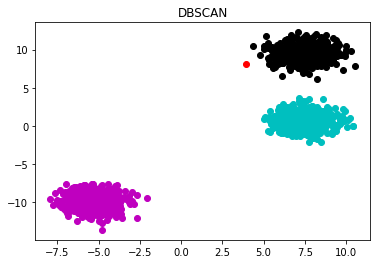

In [26]:
# Fit the datasets
sLabels, sClusters = custom_DBSCAN.fit(x5, 1.3, 8)
custom_DBSCAN.visualize(x5, sLabels, sClusters)

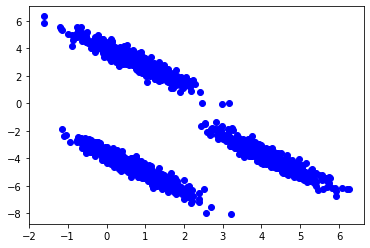

In [27]:
plt.scatter(x6[:,0],x6[:,1],c="blue",marker="o")
plt.show()

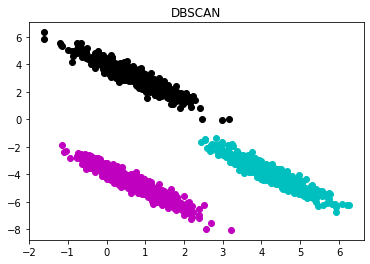

In [28]:
# Fit the datasets
sLabels, sClusters = custom_DBSCAN.fit(x6, 1.3, 8)
custom_DBSCAN.visualize(x6, sLabels, sClusters)

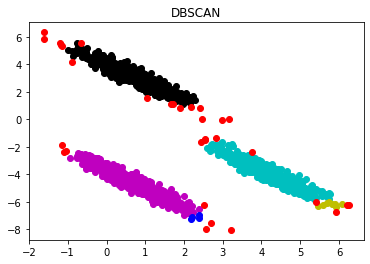

In [31]:
# Fit the datasets
sLabels, sClusters = custom_DBSCAN.fit(x6, 0.25, 4)
custom_DBSCAN.visualize(x6, sLabels, sClusters)

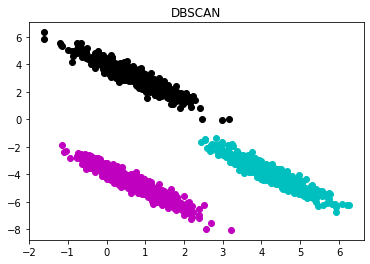

In [32]:
# Fit the datasets
sLabels, sClusters = custom_DBSCAN.fit(x6, 1, 4)
custom_DBSCAN.visualize(x6, sLabels, sClusters)

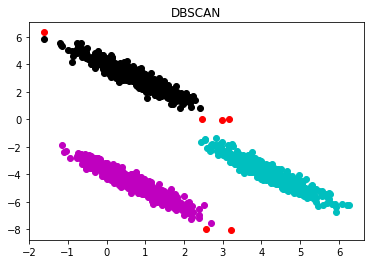

In [38]:
# Fit the datasets
sLabels, sClusters = custom_DBSCAN.fit(x6, 0.6, 4)
custom_DBSCAN.visualize(x6, sLabels, sClusters)

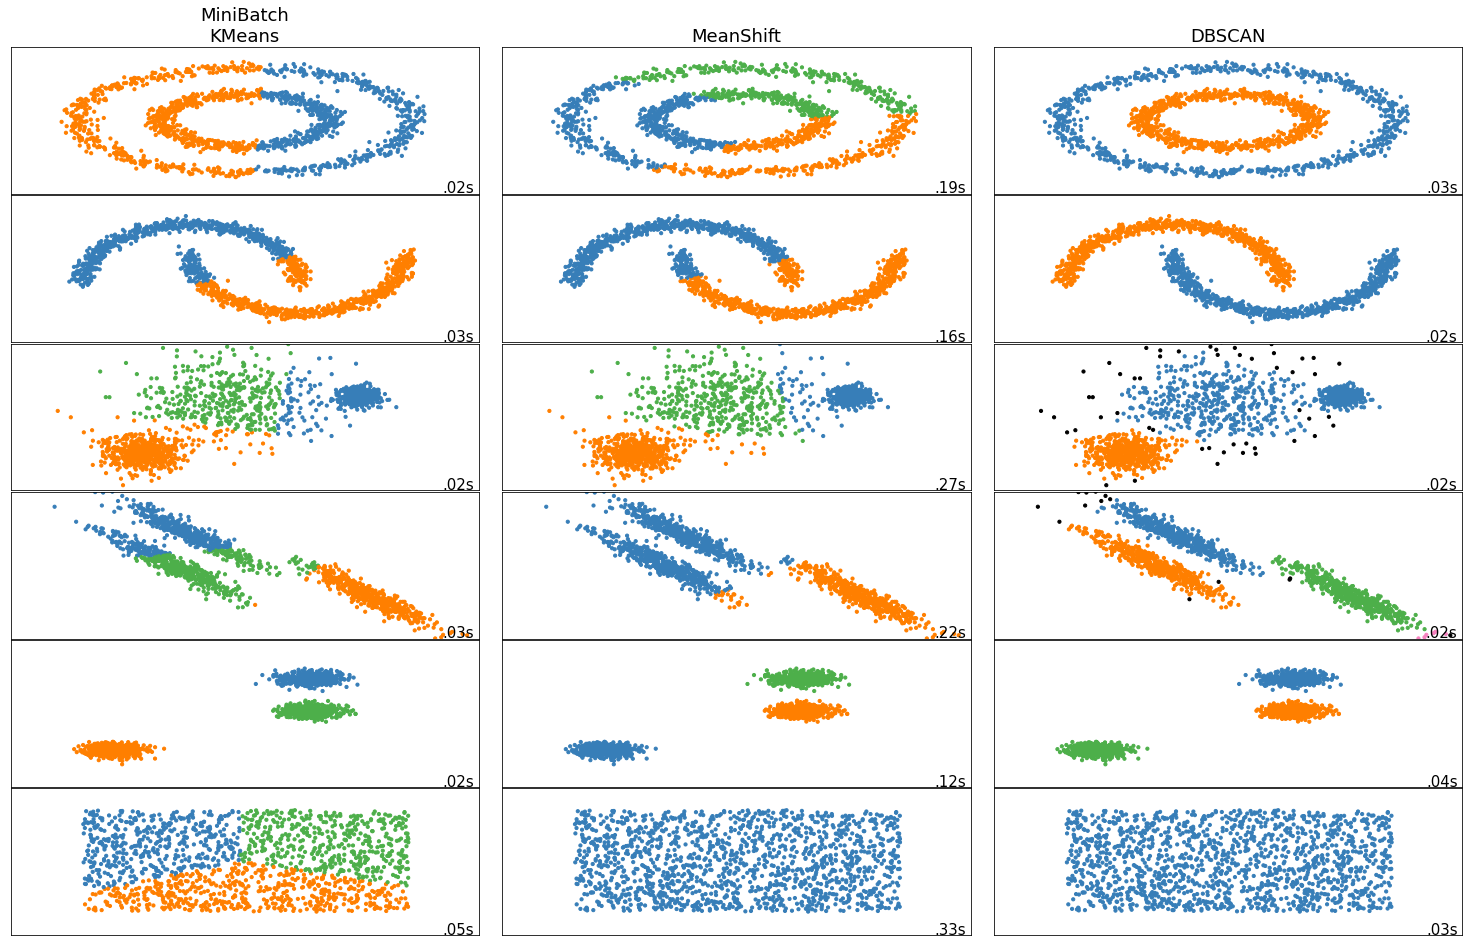

In [30]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    dbscan = cluster.DBSCAN(eps=params['eps'])

    clustering_algorithms = (
        ('MiniBatch\nKMeans', two_means),
        ('MeanShift', ms),
        ('DBSCAN', dbscan)

    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

____________________________________________________________